In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv("database/steam.csv",encoding= 'unicode_escape')
df["rating"]=df["positive_ratings"]/(df["positive_ratings"]+df["negative_ratings"])*100
df["totalRatings"]=df["positive_ratings"]+df["negative_ratings"]
df = df.drop(index=[6258,6259])#Tratando Dados corrompidos.
df["windows"]=[1 if "windows" in x else 0 for x in df["platforms"]]
df["linux"]=[1 if "linux" in x else 0 for x in df["platforms"]]
df["mac"]=[1 if "mac" in x else 0 for x in df["platforms"]]
df["owners"]=[int(x.split("-")[0]) for x in df["owners"]]
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,negative_ratings,average_playtime,median_playtime,owners,price,rating,totalRatings,windows,linux,mac
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,3339.0,17612.0,317,10000000,7.19,97.388815,127873.0,1,1,1
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,633.0,277.0,62,5000000,3.99,83.978740,3951.0,1,1,1
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,398.0,187.0,34,5000000,3.99,89.564761,3814.0,1,1,1
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,267.0,258.0,184,5000000,3.99,82.662338,1540.0,1,1,1
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,288.0,624.0,415,5000000,3.99,94.799567,5538.0,1,1,1


In [124]:
df1=df.groupby("owners").sum()[["linux","mac","windows"]].sort_values("owners")
df1

,linux,mac,windows
owners,,,
0,2987,4806,18591
20000,717,1092,3059
50000,429,640,1694
100000,395,538,1386
200000,372,528,1272
500000,140,203,513
1000000,81,118,288
2000000,72,94,193
5000000,24,29,46


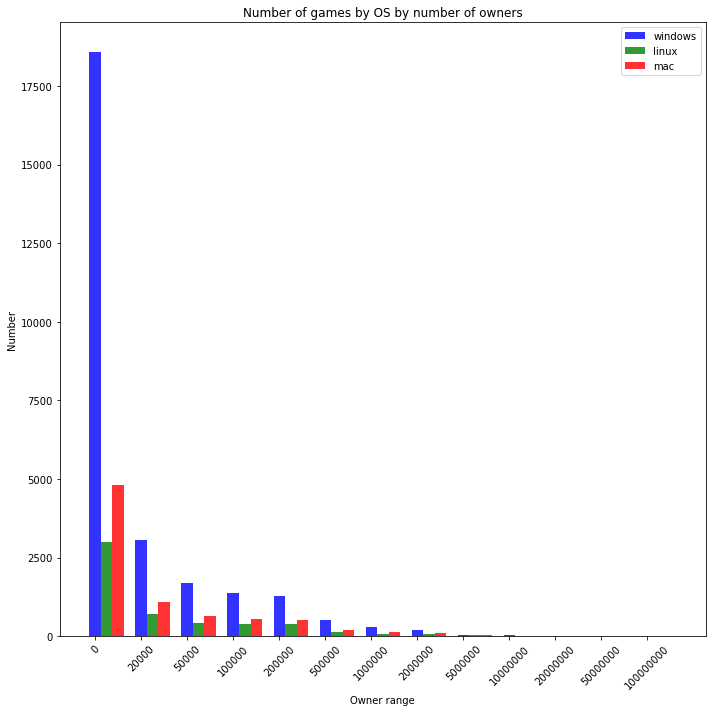

In [125]:
# create plot
fig, ax = plt.subplots(figsize=(10,10))
index = np.arange(len(df1))
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, df1["windows"], bar_width,
alpha=opacity,
color='b',
label='windows')

rects2 = plt.bar(index + bar_width, df1["linux"], bar_width,
alpha=opacity,
color='g',
label='linux')

rects3 = plt.bar(index + 2*bar_width, df1["mac"], bar_width,
alpha=opacity,
color='r',
label='mac')

plt.xlabel('Owner range')
plt.ylabel('Number')
plt.title('Number of games by OS by number of owners')
plt.xticks(index, df1.index,rotation=45)

plt.legend()

plt.tight_layout()
plt.show()

In [126]:
# df2 = pd.read_csv("SteamCharts.csv",encoding= 'unicode_escape')
# df2.head()

In [127]:
# df3 = pd.read_csv("steam_reviews.csv",encoding= 'unicode_escape')
# df3.head()

In [140]:
df.genres.value_counts()

Action;Indie                                                                1852
Casual;Indie                                                                1482
Action;Adventure;Indie                                                      1229
Adventure;Indie                                                             1170
Action;Casual;Indie                                                         1004
                                                                            ... 
Violent;Action;Adventure;Indie;Simulation;Early Access                         1
Simulation;Education;Software Training                                         1
Action;Massively Multiplayer;Strategy                                          1
Adventure;Free to Play;Massively Multiplayer;RPG;Simulation;Early Access       1
Action;Casual;Free to Play;Massively Multiplayer;Sports                        1
Name: genres, Length: 1552, dtype: int64

<AxesSubplot:xlabel='positive_ratings', ylabel='negative_ratings'>

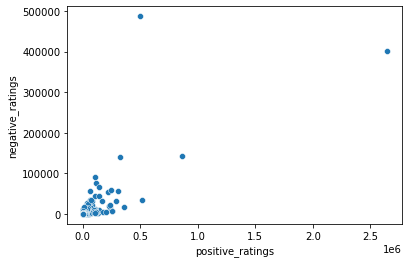

In [128]:
sns.scatterplot(data=df, x="positive_ratings", y="negative_ratings")

<AxesSubplot:xlabel='price', ylabel='positive_ratings'>

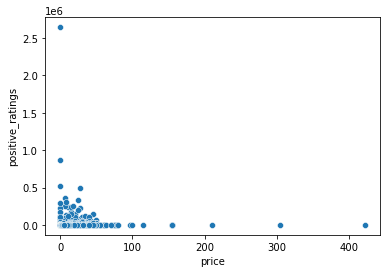

In [129]:
sns.scatterplot(data=df, x="price", y="positive_ratings")

<AxesSubplot:xlabel='price', ylabel='negative_ratings'>

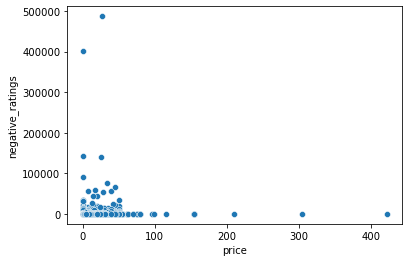

In [130]:
sns.scatterplot(data=df, x="price", y="negative_ratings")

<AxesSubplot:xlabel='required_age', ylabel='price'>

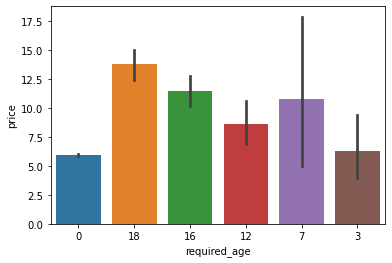

In [131]:
sns.barplot(data=df, x="required_age", y="price")

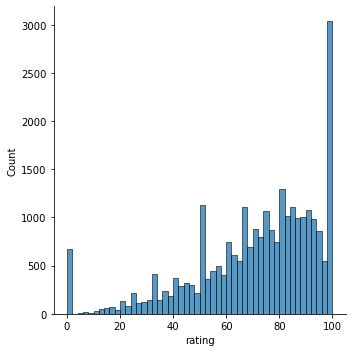

In [132]:
sns.displot(df, x="rating", binwidth=2)

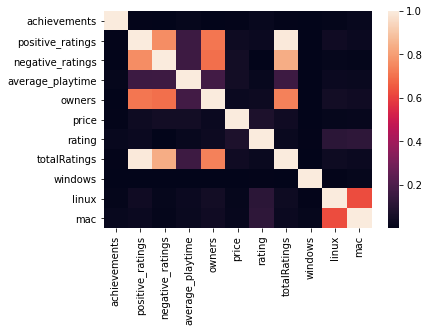

In [139]:
#always remember your magic function if using Jupyter
%matplotlib inline
sns.heatmap(abs(df.corr()))
plt.show()